# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

The zip file should be unzipped to reference the data.

#2 
 The data dictionary does not document how missings are handled. For the categorical variables, it does describe the possible data values for some aspects, such as MM/DD/YY, but it does not specify for others such as name. There are no missing value codes. For numeric variables, it describes how a blank means that the value is for the prior week. A data dictionary seems useful when a column name might be a bit obscure, but it seems as though the user has to figure out the missing values themselves. It could also be useful to see the type so the user knows if it is a number or text. 

#3
I want to look at Residents Weekly COVID-19 Deaths, Residents Hospitalizations with Confirmed COVID-19, and Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines. It would be interesting to see how COVID deaths and hospitalizations correlate as well. 

#4 
A lot of the deaths and hospitalizations are typically concentrated around a lower value. However, there are definitely outliers, such as 85 for weekly covid deaths, 160 for hospitalizations, and 85 for vaccinated hospitalizations. 

#5
I rescaled it so that it used an arcsin function, but a there are a lot of values at 0 for most of the data, so the histogram looks very skewed. 

#6 
Surprsingly, there is not much of a correlation between deaths and COVID hospitalizations. However, when residents don't have vaccines, it seems as though there's more of a chance of them being hospitalized and dying. 

#7 
There is a lot that can be deduced from this data. Something specific is that 0 hospitalizations for vaccinated and regular hospitalizations is the most common statistic. A general trend that can be seen is that when hospitalizations increase, so do the deaths typically. However, at a certain point, there is a drop off in deaths. Conclusions are difficult to be made at more complex combinations that are more rare because there are less data points in that category. 

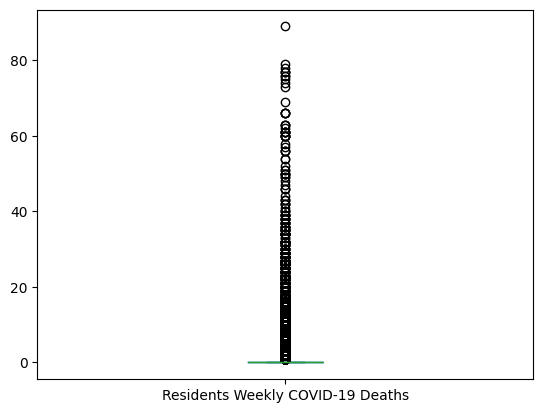

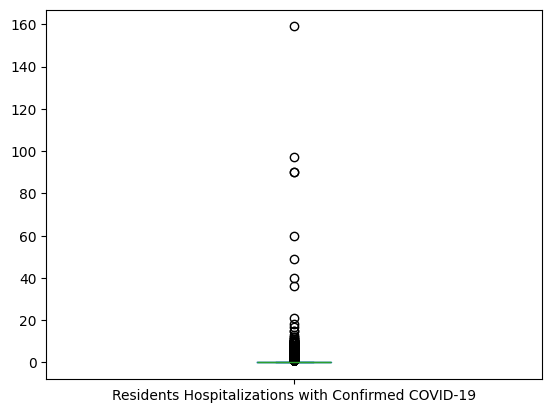

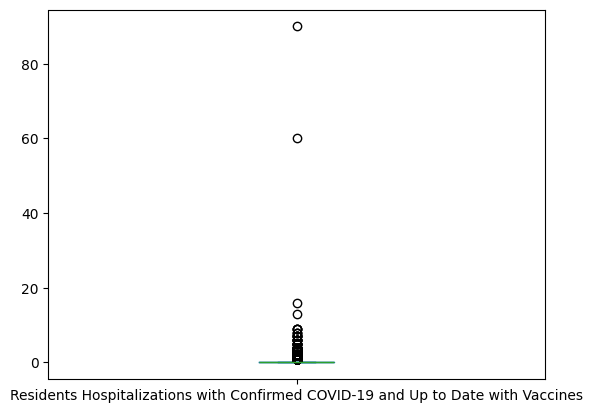

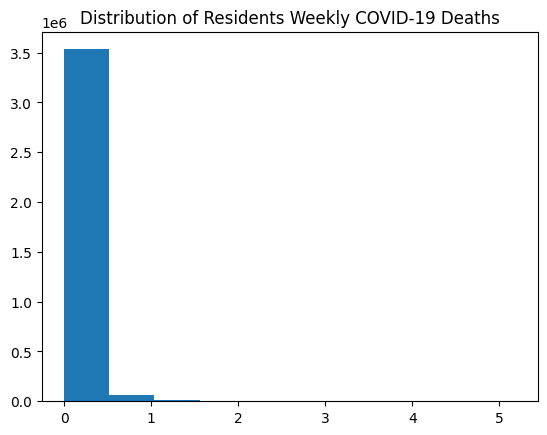

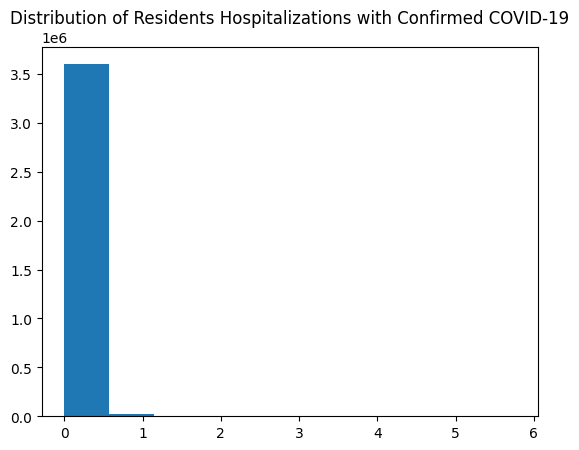

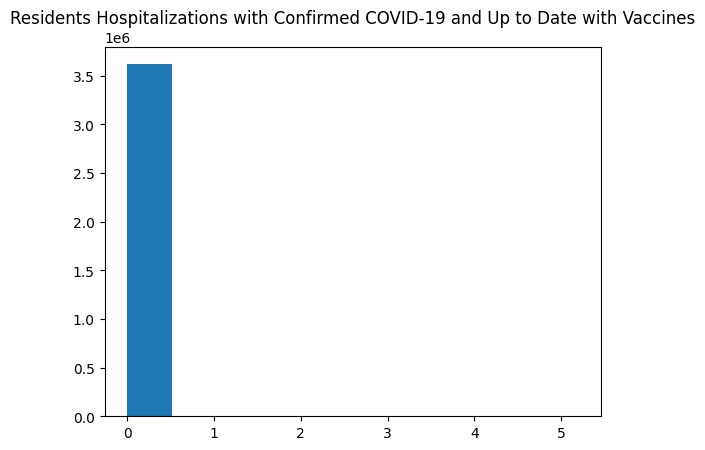

Residents Weekly COVID-19 Deaths  \
                                                                                                                                 count   
Residents Hospitalizations with Confirmed COVID... Residents Hospitalizations with Confirmed COVID-19                                    
0.0                                                0.0                                                                       3597350.0   
                                                   1.0                                                                         17178.0   
                                                   2.0                                                                          2670.0   
                                                   3.0                                                                           569.0   
                                                   4.0                                                                           177.0   
                                                   5.0                                                                            43.0   
                                                   6.0                                                                            27.0   
                                                   7.0                                                                             9.0   
                                                   8.0                                                                             7.0   
                                                   9.0                                                                            11.0   
                                                   10.0                                                                            5.0   
                                                   11.0                                                                            1.0   
                                                   12.0                                                                            2.0   
                                                   13.0                                                                            1.0   
                                                   15.0                                                                            2.0   
                                                   21.0                                                                            1.0   
                                                   36.0                                                                            1.0   
                                                   40.0                                                                            1.0   
                                                   49.0                                                                            1.0   
                                                   90.0                                                                            1.0   
                                                   97.0                                                                            1.0   
                                                   159.0                                                                           1.0   
1.0                                                1.0                                                                          6193.0   
                                                   2.0                                                                           598.0   
                                                   3.0                                                                           109.0   
                                                   4.0                                                                            21.0   
                                                   5.0                                              

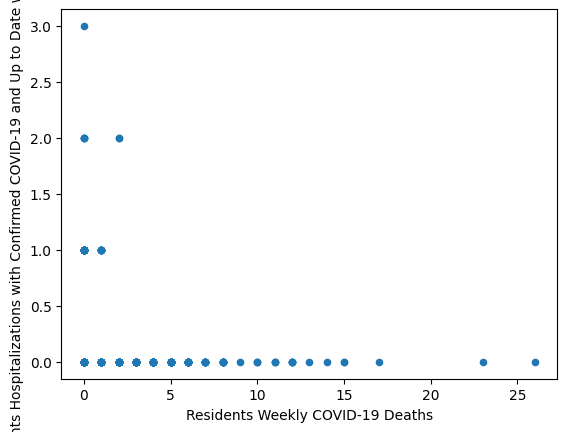

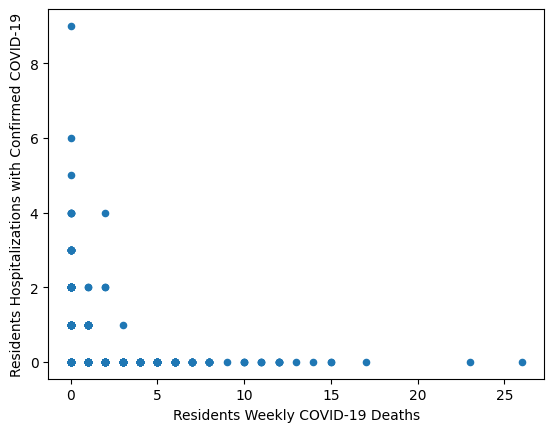

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#3 
#only read in these values because the file is too large to import other columns
df = pd.read_csv('COVID-19 Nursing Home Data 01.05.2025.csv',
                 usecols=[
                          'Residents Weekly COVID-19 Deaths',
                          'Residents Hospitalizations with Confirmed COVID-19',
                          'Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines'
],)

# replace blanks with NaN
df.replace('', np.nan, inplace=True)

# drop rows with NaN values, getting rid of rows that might not have complete data in case there are correlations
df = df.dropna()

#4
df['Residents Weekly COVID-19 Deaths'].plot.box()
plt.show()

df['Residents Hospitalizations with Confirmed COVID-19'].plot.box()
plt.show()

df['Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines'].plot.box()
plt.show()

#5
df['Deaths_arcsinh'] = np.arcsinh(df['Residents Weekly COVID-19 Deaths'])
df['Deaths_arcsinh'].hist(bins=10,grid=False)
plt.title("Distribution of Residents Weekly COVID-19 Deaths")
plt.show()

df['hospitalizations_arcsinh'] = np.arcsinh(df['Residents Hospitalizations with Confirmed COVID-19'])
df['hospitalizations_arcsinh'].hist(bins=10,grid=False)
plt.title("Distribution of Residents Hospitalizations with Confirmed COVID-19")
plt.show()

df['vaccine_arcsinh'] = np.arcsinh(df['Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines'])
df['vaccine_arcsinh'].hist(bins=10,grid=False)
plt.title("Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines")
plt.show()

#6
# Sample 50,000 random rows for plotting because data is too large the memory cannot handle it 
df_sample = df.sample(n=50000, random_state=42)
df_sample.plot.scatter(y='Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines',x='Residents Weekly COVID-19 Deaths')
df_sample.plot.scatter(y='Residents Hospitalizations with Confirmed COVID-19',x='Residents Weekly COVID-19 Deaths')

#7

df.loc[:,['Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines','Residents Hospitalizations with Confirmed COVID-19','Residents Weekly COVID-19 Deaths']].groupby(['Residents Hospitalizations with Confirmed COVID-19 and Up to Date with Vaccines','Residents Hospitalizations with Confirmed COVID-19']).describe()

**Q3.** This is a case study about understanding and visualizing risk over time, involving a dataset with information about breast cancer mortality rates over time, conditional on different treatments.

1. Load the `./data/Breast Cancer METABRIC.csv` dataset. It has a bunch of interesting variables, but the mains of interest for this question are `Overall Survival (Months)`, which is  and `Overall Survival Survival Status`, which records whether the patient is Alive or Deceased.
2. Make one kernel density plot of `Overall Survival (Months)`, and a second conditional on `Overall Survival Status`. Interpret these plots. What patterns do you see? 

3. The **hazard rate** gives the instantaneous risk of an event occurring, given that it hasn't already happened. It is defined as
$$
h(t) = \dfrac{f(t)}{1-F(t)}
$$
where $F(t)$ is the distribution of arrival times and $f(t)=F'(t)$ is the density of arrival times. Roughly, conditional on $T \ge t$, what is the probability that $T=t$? The cumulative hazard is given by
$$
H(t) = \int_0^t h(z) dz.
$$
The following function computes the hazard rate and cumulative hazard using something called the Nelson-Ahlen estimator. Run your data through it. Interpret the plots for the hazard rate and cumulative hazard rate. What patterns do you see?

```
def hazard(df):
    """ Compute cumulative hazard rate using Nelson-Ahlen estimator. """
    at_risk = df.shape[0]
    arrivals = df['survival'].sort_values().dropna().tolist()
    hazard_rate = []
    times = []
    for t in arrivals:
        select = (df['survival']==t)*(df['Overall Survival Status']=='Deceased')
        deaths_t = df[select].shape[0]
        if deaths_t > 0:
            hazard_rate.append(deaths_t/at_risk)
            times.append(t)
            at_risk -= deaths_t
    cumulative_hazard = np.cumsum(hazard_rate)
    return cumulative_hazard, times, hazard_rate
```

4. There are lots of additional categorical variables in the METABRIC dataset. Pick a categorical variable, and plot the hazard rate and cumulative hazard for each category. Do you see any interesting patterns? Is one group more likely to survive, or do their hazard rates cross over time?
5. These plots are very helpful for understanding how patients respond to treatment. Discuss how they might be used in practice, to help doctors and patients make decisions about care.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.